## Python Beispiel fuer die Wahl des Filters:
Take a signal x(n) containing 32 pixels, so N = 32, and we want to downsample with a factor of M = 4. We saw that under the downsampling in the decoder periodic aliases of the spectrum were visible, which we must suppress by the filter.

Let's try this with a DC signal. Our DC sample signal is a sequence of 32 ones, which we subsequently downsample with the factor M = 4:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

* DC Signal:

In [2]:
x = np.ones(32)

* Initialize downsampled signal:

In [3]:
xds = np.zeros(32)

* Downsample with M=4:

In [4]:
xds[0:32:4] = x[0:32:4]

* Plot both signals:

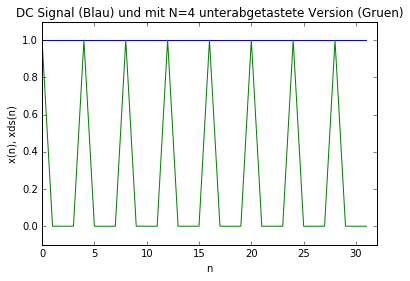

In [5]:
plt.plot(x)
plt.axis([0, 32, -0.1, 1.1]) 
plt.plot(xds)
plt.title('DC Signal (Blau) und mit N=4 unterabgetastete Version (Gruen)')
plt.xlabel('n') 
plt.ylabel('x(n), xds(n)') 

* (Note: The lines are generated by the plot function, In fact, we have only the individual samples)

* Plotting the magnitude response of the original signal:

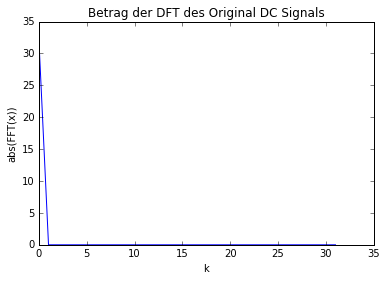

In [6]:
plt.plot(np.abs(np.fft.fft(x)))
plt.title('Betrag der DFT des Original DC Signals')
plt.xlabel('k')
plt.ylabel('abs(FFT(x))')

* Note: We have only one peak at the frequency index k = 0.

* Now we look at the magnitude response of the DFT of the undersampled version:

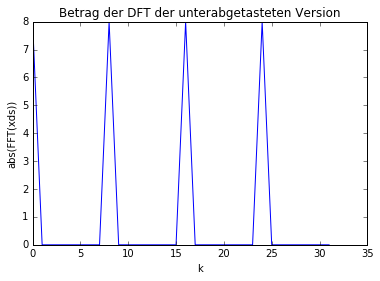

In [7]:
XDS = np.fft.fft(xds) 
plt.plot(np.abs(XDS))
plt.title('Betrag der DFT der unterabgetasteten Version')
plt.xlabel('k')  
plt.ylabel('abs(FFT(xds))') 

The peak at k = 0 corresponds to our original DC signal, the other peaks are the periodic aliasing which are not part of the original. We must now suppress this.

We can do this by setting the coefficients of the signal frequencies with the indices from 8 to 24 to zero.

Now we test a signal with a higher frequency and apply the downsampling by M = 4 again:

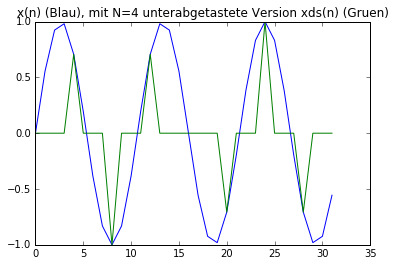

In [8]:
x = np.sin(2 * np.pi / 32 * 3 * np.arange(32))
xds = np.zeros(32)
xds[0:32:4] = x[0:32:4]
plt.plot(x)
plt.plot(xds)
plt.title('x(n) (Blau), mit N=4 unterabgetastete Version xds(n) (Gruen)')

* The magnitude response of the original signal is:

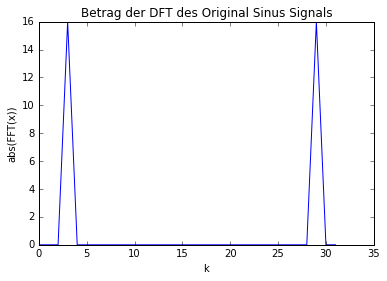

In [9]:
plt.plot(np.abs(np.fft.fft(x)))
plt.title('Betrag der DFT des Original Sinus Signals')
plt.xlabel('k')
plt.ylabel('abs(FFT(x))')

* Now we plot the magnitude response of the downsampled signal:

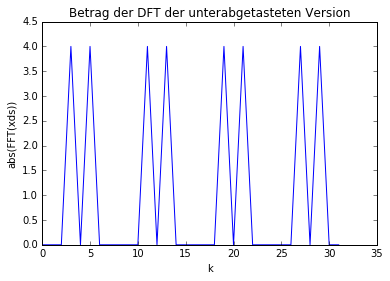

In [10]:
XDS = np.fft.fft(xds) 
plt.plot(np.abs(XDS)) 
plt.title('Betrag der DFT der unterabgetasteten Version')
plt.xlabel('k') 
plt.ylabel('abs(FFT(xds))') 

* The first peak at k = 3 and the last peak at k = 29 (because of the symmetry of the DFT) belong to the original signal, the others are periodic copies or aliases which do not belong to the original signal. Here we must now set the coefficients of the indices from 5 to 27 to zero. This is even a larger area than DC.
* Note:
  The spectral copies move toward each other, as compared to DC. We increase the frequency of our signal and the frequency of the first spectral continuation moves downwards. If we increase the frequency of our sinusoidal signal somewhat, the index k = 4 corresponds to a frequency, so the original and the first spectral copy overlap, so that they can no longer be separated, which destroys the signal.

In [11]:
x = np.sin(2 * np.pi / 32 * 4 * np.arange(32))
xds = np.zeros(32)
xds[0:32:4] = x[0:32:4]
xds

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.22464680e-16,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -2.44929360e-16,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         3.67394040e-16,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -4.89858720e-16,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   6.12323400e-16,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -7.34788079e-16,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   8.57252759e-16,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00])